In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
import matplotlib.pyplot as plt

### Read Dataset

In [2]:
df = pd.read_csv('./Data/NSDUH_HPSA_GRANT_finaldata.csv')

In [3]:
df.head()

,Id,Year,Inpatient_Past_Year,Outpatient_Past_Year,Prescription_Treatment_Past_Year,Any_Treatment_Past_Year,Treatment_Type_Past_Year,Perceived_Unmet_Need,Received_Treatment_At_Clinic_Or_Center,Received_Treatment_At_Private_Therapist,...,"('HPSA FTE', 'q75')","('HPSA Shortage', 'mean')","('HPSA Shortage', 'median')","('HPSA Shortage', 'q25')","('HPSA Shortage', 'q75')",Total Active Grant Financial Assistance median,Total Active Grant Financial Assistance mean,Total Active Grant Financial Assistance q25,Total Active Grant Financial Assistance q75,Mental Health Assistance mean
0,13005143,2015,0,0,0,0,0,0,0,0,...,7.0,3.438090,0.88,0.00,2.415,37273.5,1.491965e+05,15613.5,112903.50,0.0
1,67415143,2015,0,1,1,1,6,0,1,0,...,7.0,3.438090,0.88,0.00,2.415,37273.5,1.491965e+05,15613.5,112903.50,0.0
2,75235143,2015,0,1,1,1,6,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47745143,2015,0,0,0,0,0,0,0,0,...,7.4,4.192959,3.52,1.32,4.870,101205.0,1.443303e+06,37945.0,561582.75,0.0
4,33145143,2015,0,0,0,0,0,0,0,0,...,7.0,3.438090,0.88,0.00,2.415,37273.5,1.491965e+05,15613.5,112903.50,0.0


In [45]:
df['Serious_Psychological_Distress_Indicator_Past_Month'].value_counts()

0    181505
1     16078
Name: Serious_Psychological_Distress_Indicator_Past_Month, dtype: int64

In [6]:
for col in df.columns:
    print(col)

Id
Year
Inpatient_Past_Year
Outpatient_Past_Year
Prescription_Treatment_Past_Year
Any_Treatment_Past_Year
Treatment_Type_Past_Year
Perceived_Unmet_Need
Received_Treatment_At_Clinic_Or_Center
Received_Treatment_At_Private_Therapist
Received_Treatment_At_NonClinic_Doctor
Received_Treatment_At_Medical_Clinic
Received_Treatment_At_Day_Hospital
Received_Treatment_At_School
Received_Treatment_Other
Self_Paid
Non_Household_Member_Paid
Private_Health_Insurance_Paid
Medicare_Paid
Medicaid_Paid
Rehab_Paid
Employer_Paid
Military_Paid
Other_Public_Source_Paid
Other_Private_Source_Paid
Nobody_Paid
No_Treatment_Could_Not_Afford
No_Treatment_Feared_Neighbors_Opinion
No_Treatment_Feared_Effect_On_Job
No_Treatment_Insurance_Not_Covered
No_Treatment_Insurance_Not_Covered_Enough
No_Treatment_Where_To_Go
No_Treatment_Confidentiality_Concerns
No_Treatment_Fear_Of_Being_Committed
No_Treatment_Didnt_Think_Needed
No_Treatment_Handle_Problem_Without
No_Treatment_Didnt_Think_Would_Help
No_Treatment_Didnt_Have_T

In [3]:
df = df.dropna()
X = df.drop(['Serious_Psychological_Distress_Indicator_Past_Month','Id','Serious_Psychological_Distress_Indicator_Past_Year'], axis=1) # independent variables data
y = df['Serious_Psychological_Distress_Indicator_Past_Month']  # dependent variable data


In [4]:
X.shape

(197583, 149)

### Correlation

In [ ]:
# borrowing Steph's code here

In [4]:
df_cat_label =  pd.concat([df.loc[:, ['Serious_Psychological_Distress_Indicator_Past_Month','Inpatient_Past_Year', 'Outpatient_Past_Year',
       'Prescription_Treatment_Past_Year', 'Any_Treatment_Past_Year',
       'Treatment_Type_Past_Year', 'Perceived_Unmet_Need',
       'Received_Treatment_At_Clinic_Or_Center',
       'Received_Treatment_At_Private_Therapist',
       'Received_Treatment_At_NonClinic_Doctor',
       'Received_Treatment_At_Medical_Clinic',
       'Received_Treatment_At_Day_Hospital', 'Received_Treatment_At_School',
       'Received_Treatment_Other', 'Self_Paid', 'Non_Household_Member_Paid',
       'Private_Health_Insurance_Paid', 'Medicare_Paid', 'Medicaid_Paid',
       'Rehab_Paid', 'Employer_Paid', 'Military_Paid',
       'Other_Public_Source_Paid', 'Other_Private_Source_Paid', 'Nobody_Paid',
       'No_Treatment_Could_Not_Afford',
       'No_Treatment_Feared_Neighbors_Opinion',
       'No_Treatment_Feared_Effect_On_Job',
       'No_Treatment_Insurance_Not_Covered',
       'No_Treatment_Insurance_Not_Covered_Enough', 'No_Treatment_Where_To_Go',
       'No_Treatment_Confidentiality_Concerns',
       'No_Treatment_Fear_Of_Being_Committed',
       'No_Treatment_Didnt_Think_Needed',
       'No_Treatment_Handle_Problem_Without',
       'No_Treatment_No_Transport_Inconvenient', 'No_Treatment_Other',
       'Num_Weeks_Mental_Health_Difficulties',
       'Num_Days_Past_Year_Unable_To_Work',
       'Psychological_Distress_Level_Worst_Month',
       'Worst_Psychological_Distress_Level',
       'Serious_Psychological_Distress_Indicator_Past_Year',
       'Serious_Suicidal_Thoughts_Past_Year', 'Suicide_Plan_Past_Year',
       'Suicide_Attempt_Past_Year',
       'Serious_Or_Moderate_Mental_Illness_Indicator_Past_Year',
       'Moderate_Mental_Illness_Indicator_Past_Year',
       'Mild_Mental_Illness_Indicator_Past_Year',
       'Low_Or_Moderate_Mental_Illness_Indicator_Past_Year',
       'Categorical_Mental_Illness_Indicator',
       'Serious_Mental_Illness_And_Substance_Abuse',
       'Any_Mental_Illness_And_Substance_Abuse',
       'Low_Or_Moderate_Mental_Illness_And_Substance_Abuse',
       'Adult_Lifetime_Major_Depressive_Episode',
       'Adult_Past_Year_Major_Depressive_Episode',
       'Adult_Received_Counseling_Or_Meds_For_Depressive_Feelings_Past_Year',
       'Gender',
       'Age_Category_Six_Levels',
       'Education_Category',
       'Overall_Health', 'Work_Situation_Past_Week',
       'Num_Days_Skipped_Work_Past_30_Days', 'EAP_Offered',
       'Adult_Employment_Status', 'Has_Medicare', 'Has_Medicaid_Or_CHIP',
       'Has_Military_Benefit', 'Has_Private_Health_Insurance',
       'Has_Other_Health_Insurance', 'Covered_By_Any_Health_Insurance',
       'Covered_By_Any_Health_Insurance_Imputation_Revised',
       'Family_Receives_Social_Security', 'Family_Receives_SSI',
       'Family_Receives_Food_Stamps', 'Family_Receives_Public_Assistance',
       'Family_Receives_Welfare_JobPlacement_Childcare', 'Months_On_Welfare',
       'Total_Income_Respondent', 'Total_Income_Family',
       'Participated_In_One_Or_More_Government_Assistance_Programs',
       'Poverty_Level',
       'PDEN10', ]].apply(lambda x: LabelEncoder().fit_transform(x)),
                           df.loc[: , 'Adult_Employment_Status':'Worst_Psychological_Distress_Level'],
                          df[["('HPSA Shortage', 'median')","Total Active Grant Financial Assistance median",
                             "('HPSA Score', 'median')",'Mental Health Assistance mean']]], axis=1)

df_cat_label.head()

,Serious_Psychological_Distress_Indicator_Past_Month,Inpatient_Past_Year,Outpatient_Past_Year,Prescription_Treatment_Past_Year,Any_Treatment_Past_Year,Treatment_Type_Past_Year,Perceived_Unmet_Need,Received_Treatment_At_Clinic_Or_Center,Received_Treatment_At_Private_Therapist,Received_Treatment_At_NonClinic_Doctor,...,Months_On_Welfare,Total_Income_Respondent,Total_Income_Family,Participated_In_One_Or_More_Government_Assistance_Programs,Poverty_Level,PDEN10,"('HPSA Shortage', 'median')",Total Active Grant Financial Assistance median,"('HPSA Score', 'median')",Mental Health Assistance mean
0,0,1,1,1,1,1,1,1,1,1,...,1,1,3,1,2,1,0.88,37273.5,17.0,0.0
1,0,1,2,2,2,7,1,2,1,1,...,0,0,0,0,1,1,0.88,37273.5,17.0,0.0
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,3.52,101205.0,14.0,0.0
4,0,1,1,1,1,1,1,1,1,1,...,0,3,3,0,3,1,0.88,37273.5,17.0,0.0
5,0,1,1,1,1,1,1,1,1,1,...,0,3,6,0,3,0,3.52,101205.0,14.0,0.0


In [5]:
chi2_res = feature_selection.chi2(df_cat_label, df.Serious_Psychological_Distress_Indicator_Past_Month)

df_chi2 = pd.DataFrame({
    'attr1': 'Serious_Psychological_Distress_Indicator_Past_Month',
    'attr2': df_cat_label.columns,
    'chi2': chi2_res[0],
    'p': chi2_res[1],
    'alpha': 0.01
})

df_chi2['H0'] = np.where(df_chi2['p'] < 0.01, 'reject','fail to reject')

df_chi2[df_chi2['H0'] == 'reject'].sort_values('chi2')

,attr1,attr2,chi2,p,alpha,H0
82,Serious_Psychological_Distress_Indicator_Past_...,"('HPSA Shortage', 'median')",7.232239e+00,0.007161,0.01,reject
69,Serious_Psychological_Distress_Indicator_Past_...,Covered_By_Any_Health_Insurance,9.419471e+00,0.002147,0.01,reject
70,Serious_Psychological_Distress_Indicator_Past_...,Covered_By_Any_Health_Insurance_Imputation_Rev...,1.762023e+01,0.000027,0.01,reject
9,Serious_Psychological_Distress_Indicator_Past_...,Received_Treatment_At_NonClinic_Doctor,1.844520e+01,0.000017,0.01,reject
81,Serious_Psychological_Distress_Indicator_Past_...,PDEN10,2.170103e+01,0.000003,0.01,reject
...,...,...,...,...,...,...
40,Serious_Psychological_Distress_Indicator_Past_...,Worst_Psychological_Distress_Level,4.705490e+05,0.000000,0.01,reject
37,Serious_Psychological_Distress_Indicator_Past_...,Num_Weeks_Mental_Health_Difficulties,5.164374e+05,0.000000,0.01,reject
85,Serious_Psychological_Distress_Indicator_Past_...,Mental Health Assistance mean,2.803233e+06,0.000000,0.01,reject
38,Serious_Psychological_Distress_Indicator_Past_...,Num_Days_Past_Year_Unable_To_Work,3.454126e+06,0.000000,0.01,reject


In [9]:
df_chi2[df_chi2['H0']=='fail to reject'].sort_values('p')

,attr1,attr2,chi2,p,alpha,H0
71,Serious_Psychological_Distress_Indicator_Past_...,Family_Receives_Social_Security,4.175081,0.041023,0.05,fail to reject
84,Serious_Psychological_Distress_Indicator_Past_...,"('HPSA Score', 'median')",4.029486,0.044712,0.05,fail to reject
10,Serious_Psychological_Distress_Indicator_Past_...,Received_Treatment_At_Medical_Clinic,3.808846,0.050983,0.05,fail to reject
66,Serious_Psychological_Distress_Indicator_Past_...,Has_Military_Benefit,1.967444,0.160719,0.05,fail to reject
11,Serious_Psychological_Distress_Indicator_Past_...,Received_Treatment_At_Day_Hospital,0.955502,0.328323,0.05,fail to reject
13,Serious_Psychological_Distress_Indicator_Past_...,Received_Treatment_Other,0.029265,0.864170,0.05,fail to reject
12,Serious_Psychological_Distress_Indicator_Past_...,Received_Treatment_At_School,0.001838,0.965803,0.05,fail to reject


In [6]:
col_options = list(df_chi2[df_chi2['H0'] == 'reject']['attr2'])

for col in col_options:
    print(col)

Serious_Psychological_Distress_Indicator_Past_Month
Inpatient_Past_Year
Outpatient_Past_Year
Prescription_Treatment_Past_Year
Any_Treatment_Past_Year
Treatment_Type_Past_Year
Perceived_Unmet_Need
Received_Treatment_At_Clinic_Or_Center
Received_Treatment_At_Private_Therapist
Received_Treatment_At_NonClinic_Doctor
Self_Paid
Non_Household_Member_Paid
Private_Health_Insurance_Paid
Medicare_Paid
Medicaid_Paid
Rehab_Paid
Employer_Paid
Military_Paid
Other_Public_Source_Paid
Other_Private_Source_Paid
Nobody_Paid
No_Treatment_Could_Not_Afford
No_Treatment_Feared_Neighbors_Opinion
No_Treatment_Feared_Effect_On_Job
No_Treatment_Insurance_Not_Covered
No_Treatment_Insurance_Not_Covered_Enough
No_Treatment_Where_To_Go
No_Treatment_Confidentiality_Concerns
No_Treatment_Fear_Of_Being_Committed
No_Treatment_Didnt_Think_Needed
No_Treatment_Handle_Problem_Without
No_Treatment_No_Transport_Inconvenient
No_Treatment_Other
Num_Weeks_Mental_Health_Difficulties
Num_Days_Past_Year_Unable_To_Work
Psychological_

### Detect Multicollinearity using VIF

In [7]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data.sort_values('VIF'))

/Users/michellli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/michellli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                                               feature       VIF
69                  Num_Days_Skipped_Work_Past_30_Days  1.044106
67                                      Overall_Health  1.213141
41                   Num_Days_Past_Year_Unable_To_Work  1.400641
74                                Has_Military_Benefit  1.413339
66                                  Education_Category  1.483485
..                                                 ...       ...
148                      Mental Health Assistance mean       inf
100  HPSA Designation Population Type Description_L...       NaN
103  HPSA Designation Population Type Description_L...       NaN
106  HPSA Designation Population Type Description_M...       NaN
107  HPSA Designation Population Type Description_N...       NaN

[149 rows x 2 columns]


In [46]:
vif_data[vif_data['VIF']<=10].sort_values('VIF')

,feature,VIF
69,Num_Days_Skipped_Work_Past_30_Days,1.044106
67,Overall_Health,1.213141
41,Num_Days_Past_Year_Unable_To_Work,1.400641
74,Has_Military_Benefit,1.413339
66,Education_Category,1.483485
40,Num_Weeks_Mental_Health_Difficulties,1.700444
82,Family_Receives_Public_Assistance,1.736175
79,Family_Receives_Social_Security,1.770275
1,Inpatient_Past_Year,1.798739
80,Family_Receives_SSI,1.843777


In [9]:
# keep variables with VIF < 5
cols_to_keep = list(vif_data[vif_data['VIF']<=5]['feature'])


In [55]:
# socioeconomic control variables 
soc_control_vars = ['Gender','Age_Category_Six_Levels','Race_Ethnicity','Education_Category','Overall_Health',
                   'Total_Income_Respondent','Adult_Employment_Status','Covered_By_Any_Health_Insurance']

# hpsa grant
hpsa_grant = ['PDEN10',"Total Active Grant Financial Assistance median","('HPSA Score', 'median')"]

# other hypotheses
exposure_vars = ['County_Metro_NonMetro_Status','Has_Medicaid_Or_CHIP','Has_Medicare','Poverty_Level',
                 'Received_Treatment_At_Private_Therapist','Num_Days_Skipped_Work_Past_30_Days',
                 'EAP_Offered','Work_Situation_Past_Week','No_Treatment_Where_To_Go','No_Treatment_Could_Not_Afford',
                 'Psychological_Distress_Level_Worst_Month'
                ]

### Key Driver Analysis 

In [18]:
y.value_counts()

0    181505
1     16078
Name: Serious_Psychological_Distress_Indicator_Past_Month, dtype: int64

#### Model # 1
Impact of grants and HPSAs

In [51]:
cols = soc_control_vars + hpsa_grant
X_2 = X[cols]
log_reg = sm.Logit(y, X_2).fit()

Optimization terminated successfully.
         Current function value: 0.251719
         Iterations 7


In [52]:
print(log_reg.summary())

                                            Logit Regression Results                                           
Dep. Variable:     Serious_Psychological_Distress_Indicator_Past_Month   No. Observations:               197583
Model:                                                           Logit   Df Residuals:                   197572
Method:                                                            MLE   Df Model:                           10
Date:                                                 Wed, 20 Oct 2021   Pseudo R-squ.:                  0.1077
Time:                                                         00:07:38   Log-Likelihood:                -49735.
converged:                                                        True   LL-Null:                       -55740.
Covariance Type:                                             nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025  

In [56]:
# Adjusted odds ratio 
for col, val in zip(cols,log_reg.params.values):
    print(col + ": ",np.exp(val))

Gender:  1.344090850565304
Age_Category_Six_Levels:  0.6129547311795595
Race_Ethnicity:  0.9350680885563295
Education_Category:  0.9628990686152255
Overall_Health:  1.9345177797776274
Total_Income_Respondent:  0.865452187331238
Adult_Employment_Status:  1.0558123347784245
Covered_By_Any_Health_Insurance:  0.9926504613904432
PDEN10:  1.6470703391502612
Total Active Grant Financial Assistance median:  1.0000001397637392
('HPSA Score', 'median'):  0.811805709071536


Interpretation:
- Having any sort of insurance is not stat sig 
- PDEN10, grants, and HPSA scores are stat sig! 
    - PDEN10: living in a CBSA with < 1M persons makes you 64% more likely to face serious psychological distress
    - Living in an area with more grants, however, does not make you more or less likely to face serious psychological distress
    - Having a higher HPSA score in your location makes you 19% less likely to face serious psychological distress
        - Higher HPSA score means the greater the priority for an area to get resources
    

#### Model #2



In [47]:
# socioeconomic control variables 
soc_control_vars = ['Age_Category_Six_Levels','Race_Ethnicity','Education_Category','Overall_Health',
                   'Total_Income_Respondent','Adult_Employment_Status']

# hpsa grant
hpsa_grant = ['PDEN10',"Total Active Grant Financial Assistance median","('HPSA Score', 'median')"]

# other hypotheses
exposure_vars = ['Has_Medicaid_Or_CHIP','Poverty_Level',
                 'Received_Treatment_At_Private_Therapist','Received_Treatment_At_School',
                 'Received_Treatment_At_NonClinic_Doctor','Num_Days_Skipped_Work_Past_30_Days',
                 'No_Treatment_Could_Not_Afford', 'Psychological_Distress_Level_Worst_Month',
                 'Adult_Lifetime_Major_Depressive_Episode'
                ]

In [48]:
cols = soc_control_vars + exposure_vars + hpsa_grant
X_3 = X[cols]

In [39]:
log_reg = sm.Logit(y, X_3).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.221964
         Iterations 8
                                            Logit Regression Results                                           
Dep. Variable:     Serious_Psychological_Distress_Indicator_Past_Month   No. Observations:               197583
Model:                                                           Logit   Df Residuals:                   197564
Method:                                                            MLE   Df Model:                           18
Date:                                                 Thu, 21 Oct 2021   Pseudo R-squ.:                  0.2132
Time:                                                         17:37:25   Log-Likelihood:                -43856.
converged:                                                        True   LL-Null:                       -55740.
Covariance Type:                                             nonrobust   LLR p-value:                     0.000
  

In [40]:
# Adjusted odds ratio 
for col, val in zip(cols,log_reg.params.values):
    print(col + ": ",np.exp(val))

Gender:  0.9733478257269608
Age_Category_Six_Levels:  0.6418987733250536
Race_Ethnicity:  0.9458254875481223
Education_Category:  0.8314060212129829
Overall_Health:  1.660899376181537
Total_Income_Respondent:  0.9042081041638107
Adult_Employment_Status:  0.9449132733710618
Covered_By_Any_Health_Insurance:  0.8584370532119995
County_Metro_NonMetro_Status:  0.9557395051502434
Has_Medicaid_Or_CHIP:  1.3544820222840346
Has_Medicare:  1.3273316022120443
Poverty_Level:  0.9313136053816201
Received_Treatment_At_Private_Therapist:  2.8329868940870866
Months_On_Welfare:  1.0135086001846079
Num_Days_Skipped_Work_Past_30_Days:  1.1214007989519486
EAP_Offered:  0.9045806746454255
Work_Situation_Past_Week:  1.0287356396498424
No_Treatment_Where_To_Go:  2.1011597187354405
No_Treatment_Could_Not_Afford:  2.22162977736156


#### Model #3

If we include all of our variables, what R^2 could we achieve?


In [46]:
log_reg = sm.Logit(y, X[cols_to_keep]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.118051
         Iterations 9
                                            Logit Regression Results                                           
Dep. Variable:     Serious_Psychological_Distress_Indicator_Past_Month   No. Observations:               197583
Model:                                                           Logit   Df Residuals:                   197549
Method:                                                            MLE   Df Model:                           33
Date:                                                 Thu, 21 Oct 2021   Pseudo R-squ.:                  0.5815
Time:                                                         18:03:49   Log-Likelihood:                -23325.
converged:                                                        True   LL-Null:                       -55740.
Covariance Type:                                             nonrobust   LLR p-value:                     0.000
  

Findings: 
- Whether or not a family receives any sort of government assistance has no impact on psychological distress in the past month
- Receiving treatment at a Private Therapist, Non-Clinic Doctor, School, and Day Hospital makes a difference in psychological distress in the past month, however, other types of treatment do not.
- Having Medicare does not make a difference on someone's psychological distress in the past month but having other types of insurance does make a difference. 

#### Model #4 Final

In [10]:
# socioeconomic control variables 
soc_control_vars = ['Age_Category_Six_Levels','Race_Ethnicity','Education_Category','Overall_Health',
                   'Total_Income_Respondent','Adult_Employment_Status']

# hpsa grant
hpsa_grant = ['PDEN10',"Total Active Grant Financial Assistance median","('HPSA Score', 'median')"]

# other hypotheses
exposure_vars = ['Has_Medicaid_Or_CHIP','Poverty_Level',
                 'Received_Treatment_At_Private_Therapist','Received_Treatment_At_School',
                 'Received_Treatment_At_NonClinic_Doctor','Num_Days_Skipped_Work_Past_30_Days',
                 'No_Treatment_Could_Not_Afford'
                ]

In [11]:
cols = soc_control_vars + exposure_vars + hpsa_grant
log_reg = sm.Logit(y, X[cols]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.222373
         Iterations 8
                                            Logit Regression Results                                           
Dep. Variable:     Serious_Psychological_Distress_Indicator_Past_Month   No. Observations:               197583
Model:                                                           Logit   Df Residuals:                   197567
Method:                                                            MLE   Df Model:                           15
Date:                                                 Thu, 21 Oct 2021   Pseudo R-squ.:                  0.2118
Time:                                                         23:16:59   Log-Likelihood:                -43937.
converged:                                                        True   LL-Null:                       -55740.
Covariance Type:                                             nonrobust   LLR p-value:                     0.000
  

In [21]:
final_metrics = pd.DataFrame()
final_metrics['Variable'] = cols
final_metrics['Coef'] = log_reg.params.values

# Adjusted odds ratio 
exp = []
interp = []
for col, val in zip(cols,log_reg.params.values):
    exp.append(np.exp(val))
    interp.append(str((np.exp(val) - 1) * 100)+"%")
                  
final_metrics['Odds Ratio'] = exp
final_metrics['percent'] = interp 

In [23]:
final_metrics.sort_values("Odds Ratio")

,Variable,Coef,Odds Ratio,percent
9,Received_Treatment_At_School,-9.151456e-01,0.400458,-59.95416751480598%
0,Age_Category_Six_Levels,-4.149630e-01,0.660365,-33.96353018503259%
2,Education_Category,-1.405735e-01,0.868860,-13.114020449159636%
4,Total_Income_Respondent,-1.059466e-01,0.899473,-10.052729450045728%
15,"('HPSA Score', 'median')",-9.239444e-02,0.911745,-8.825455338699728%
1,Race_Ethnicity,-4.042451e-02,0.960382,-3.9618337340345477%
7,Poverty_Level,-3.909203e-02,0.961662,-3.833779325660136%
14,Total Active Grant Financial Assistance median,8.219560e-08,1.000000,8.219560099220757e-06%
5,Adult_Employment_Status,8.740648e-02,1.091340,9.134020251061802%
11,Num_Days_Skipped_Work_Past_30_Days,1.177067e-01,1.124914,12.491416772271325%


Findings
- When someone has received treatment with a private therapist, he/she is 2.73x more likely to have experienced psychological distress in the past month. 
- When someone cannot afford treatment, he/she is 2.13x more likely to have experienced psychological distress in the past month. 
- When someone did not get treatment because he/she did not know where to go, he/she is 2.11x more likely to have experienced psychological distress in the past month. 
- When someone has received treatment at schoole, he/she is 60% less likely to have experienced psychological distress in the past month. 
- Increasing age band by 1 is associated with an individual being 34% less likely to have experienced psychological distress in the past month. 

#### Model 5 Train test split

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, auc


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X[cols], y, test_size=0.33, random_state=42)

In [40]:
oversample = RandomOverSampler(sampling_strategy='minority')
print(y_train.shape)
X_over, y_over = oversample.fit_resample(X_train, y_train)
print(y_over.shape)

(132380,)
(243196,)


In [21]:
undersample = RandomUnderSampler(sampling_strategy='majority')
print(y_train.shape)
X_over, y_over = undersample.fit_resample(X_train, y_train)
print(y_over.shape)

(132380,)
(21564,)


In [36]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_over, y_over)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.48134288299618117


/Users/michellli/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[27762 32145]
 [ 1673  3623]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.698


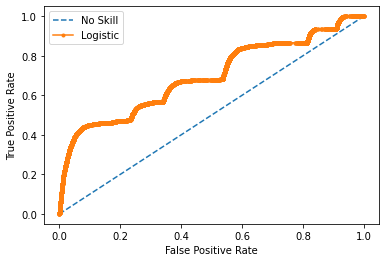

In [38]:
# predict probabilities
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = logisticRegr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### statsmodel attempt

In [63]:
# socioeconomic control variables 
soc_control_vars = ['Gender','Age_Category_Six_Levels','Race_Ethnicity','Education_Category','Overall_Health',
                   'Total_Income_Respondent','Covered_By_Any_Health_Insurance']

# hpsa grant
hpsa_grant = ['PDEN10',"('HPSA Score', 'median')"]

# other hypotheses
exposure_vars = ['Has_Medicaid_Or_CHIP','Has_Medicare','Poverty_Level',
                 'Received_Treatment_At_Private_Therapist','Num_Days_Skipped_Work_Past_30_Days',
                 'EAP_Offered','Work_Situation_Past_Week','No_Treatment_Where_To_Go','No_Treatment_Could_Not_Afford',
                 'Psychological_Distress_Level_Worst_Month'
                ]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X[soc_control_vars + hpsa_grant + exposure_vars], y, test_size=0.33, random_state=42)

In [65]:
# building the model and fitting the data
log_reg = sm.Logit(y_train, X_train[soc_control_vars + hpsa_grant + exposure_vars]).fit()

Optimization terminated successfully.
         Current function value: 0.193490
         Iterations 8


In [66]:
print(log_reg.summary())

                                            Logit Regression Results                                           
Dep. Variable:     Serious_Psychological_Distress_Indicator_Past_Month   No. Observations:               132380
Model:                                                           Logit   Df Residuals:                   132361
Method:                                                            MLE   Df Model:                           18
Date:                                                 Fri, 22 Oct 2021   Pseudo R-squ.:                  0.3146
Time:                                                         00:12:34   Log-Likelihood:                -25614.
converged:                                                        True   LL-Null:                       -37370.
Covariance Type:                                             nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.

In [67]:
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
 
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))

# confusion matrix
cm = metrics.confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[59036   871]
 [ 3730  1566]]
Test accuracy =  0.9294357621581829
